In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import randint

# Uniform distribution within a circle
note: for this assignment I will set all circle centers to be at the origin (0,0)

## The rejection method

In [151]:
#first set parameters for a circle
theta = np.linspace(0, 2*np.pi, 100) #theta for polar coordinates
r = 1 # radius is 1

#generate 2000  random points to plot
rand_xy=np.empty([0]) #array for points that are going to be inside the circle
out_of_range = np.empty([0]) #array for rejected points

while True:
    if len(rand_xy) == 4000:
         break #break when I have 4000 random numbers for 2000 points
    else:
        #get number pairs for points (xy-coordinates)
        #rescale so their range is from -1 to 1
        rxy = (np.random.rand(2) - 0.5)*2 
        
        if np.sqrt((rxy[0])**2 + rxy[1]**2) <=r:
            #if the distance from the circle center (origin) is smaller than the radius, we keep the point
            rand_xy = np.append(rand_xy, rxy) 
        else:
            #if not, I am going to keep them in a separate array to plot later
            out_of_range = np.append(out_of_range, rxy)
                

#reshape the arrays into 2 column matrices
rand_xy=rand_xy.reshape(-1,2)
out_of_range=out_of_range.reshape(-1,2)

<ipython-input-152-290f52cbaa22>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().grid(True) #show grid
<ipython-input-152-290f52cbaa22>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1)#adjust the aspect ratio so my circle doesn't look like an oval


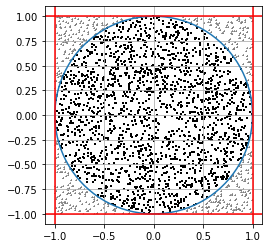

In [152]:
#set the circle coordinates and plot
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
plt.plot(x1, x2)

#set the borderlines for the square
#I know that the radius is 0 and the center of the circle is at the origin,
#so I choose my borderlines to be tight around the circle
plt.axvline(x=1,color="red")
plt.axhline(y=1,color="red")
plt.axvline(x=-1,color="red")
plt.axhline(y=-1,color="red")

#plot my random 2000 points
plt.scatter(rand_xy[:,0],rand_xy[:,1],marker='+',color="black",s=2)

#plot the rejected points for reference
plt.scatter(out_of_range[:,0],out_of_range[:,1],marker='+',color="gray",s=1)

#adjust the plot
plt.axes().grid(True) #show grid
plt.axes().set_aspect(1)#adjust the aspect ratio so my circle doesn't look like an oval

note: the black dots are the generated samples and the gray dots are rejected points

## Generating random samples for polar coordinates

<ipython-input-153-2a378d751027>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().grid(True) #show grid
<ipython-input-153-2a378d751027>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1)#adjust the aspect ratio so my circle doesn't look like an oval


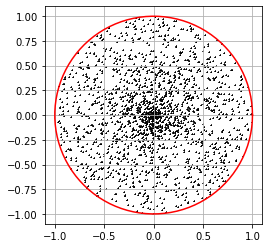

In [153]:
#generate 2000  random points to plot
mtwister_r=np.empty(2000)
mtwister_theta=np.empty(2000)

for i in range(0,len(mtwister_r)):
    mtwister_r[i ]= random.random()
for i in range(0,len(mtwister_theta)):
    mtwister_theta[i ]= random.random()

#set the circle coordinates for the random variables
x_rand = mtwister_r * np.cos(2*np.pi*mtwister_theta)
y_rand = mtwister_r * np.sin(2*np.pi*mtwister_theta)

#plot the 2000 random points
plt.scatter(x_rand , y_rand,marker="+",s=1,color="black")

#plot the original circle for reference
theta = np.linspace(0, 2*np.pi, 100) #theta for polar coordinates
r = 1 # radius is 1
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
plt.plot(x1, x2,color="red")

#adjust the plot
plt.axes().grid(True) #show grid
plt.axes().set_aspect(1)#adjust the aspect ratio so my circle doesn't look like an oval

The outputs for B are concentrated around the center of the circle

## The inverse distribution method

#### Computing the normalization constant C
By integrating $p(x) = C2\pi x$ over all possible values of $r$ and plugging it into the equation  $F(x) = Pr\{X\leq R\} = 1$, I get $C=\frac{1}{\pi}$

#### Computing the CDF and inverse CDF
After plugging in $C=\frac{1}{\pi}$ to $p(x) = C2\pi x$, I get $p(x)=2x$. 
Integrating over the derived probability, I get rthe cumulative distribution function $F(x) = y = x^2$. The inverse function would be $x = \sqrt y$

<ipython-input-154-a3efe2c614d3>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().grid(True) #show grid
<ipython-input-154-a3efe2c614d3>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1)#adjust the aspect ratio so my circle doesn't look like an oval


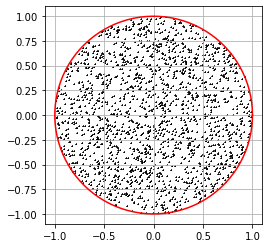

In [154]:
# random theta ~ U(0,1)
rand_theta=np.empty(2000)
for i in range(0,len(rand_theta)):
    rand_theta[i ]= random.random()

#the random y ~ U(0,1) I use to generate random samples for the radius
rand_y=np.empty(2000)
for i in range(0,len(rand_y)):
    rand_y[i ]= random.random()

#use y to get random samples from the inverse CDF
rand_r=np.empty(2000)
for i in range(0,len(rand_r)):
    rand_r[i ]= np.sqrt(rand_y[i]) #use inverse CDF x = sqrt(y)

#set x,y coordinates for the random points and plot
x_rand = rand_r * np.cos(2*np.pi*rand_theta)
y_rand = rand_r * np.sin(2*np.pi*rand_theta)

plt.scatter(x_rand , y_rand,marker="+",s=1,color="black")

#plot the original circle for reference
theta = np.linspace(0, 2*np.pi, 100) #theta for polar coordinates
r = 1 # radius is 1
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
plt.plot(x1, x2,color="red")

#adjust the plot
plt.axes().grid(True) #show grid
plt.axes().set_aspect(1)#adjust the aspect ratio so my circle doesn't look like an oval

## Comparison to the outcome of B
The outcome of B is concentrated around the center of our circle, while the inverse distribution method gives a sample that is uniformly distributed. <br>
This might be because in C we draw more samples from where data is most likely to be in the probability distribution, while we blindly plug in uniform random samples in B.

# Power-law distribution

As in the inverse distribution method for the circle, we place a constant $C$ in front of the probability distribution function (PDF) to obtain $f(x)=CAx^a$. We start to derive $C$ by integrating the PDF over the minimum and maximum values of x ($x_{min}$ and $x_{max}$) to get the full cumulative distribution function (CDF).
$$\int_{x_{min}}^{x_{max}} CAx^{\alpha}$$

Since we know that the integration above equals 1, we can obtain $C$ as:

$$C= \frac{\alpha+1}{A\cdot(x^{\alpha+1}_{max} - x^{\alpha+1}_{min})}$$

Plugging this into our original PDF gives us $f(x)=\frac{\alpha+1}{x^{\alpha+1}_{max} - x^{\alpha+1}_{min}}\cdot x^\alpha$, and re-integrating the PDF over $x_{min}$ and $x$ gives us the below CDF.
$$y = F(x) = \frac{x^{\alpha+1}}{x^{\alpha+1}_{max} - x^{\alpha+1}_{min}} - \frac{x^{\alpha+1}_{min}}{x^{\alpha+1}_{max} - x^{\alpha+1}}$$

Rearranging the CDF gives us the below inverse CDF:
$$x = \{(x^{\alpha+1}_{max} - x^{\alpha+1}_{min})\cdot y + x^{\alpha+1}_{min}\}^{\frac{1}{\alpha+1}}$$

From the question we know that we need to set the minimum value for $x$ ($x_{min}$) as 1. I will set the maximum value $x_{max}$ as the same value in the question statement, 737.

In [37]:
#validating the range for y
x_lower_range=1
x_upper_range=737 #from the assignment
alpha=-3/2

#calculating y's range from the CDF
y_lower_range= x_lower_range**(alpha+1) / (x_upper_range**(alpha+1) - x_lower_range**(alpha+1)) -  \
x_lower_range**(alpha+1) / (x_upper_range**(alpha+1) - x_lower_range**(alpha+1))

y_upper_range= x_upper_range**(alpha+1) / (x_upper_range**(alpha+1) - x_lower_range**(alpha+1)) -  \
x_lower_range**(alpha+1) / (x_upper_range**(alpha+1) - x_lower_range**(alpha+1))

print("the min value for y:",y_lower_range)
print("the max value for y:",y_upper_range)

the min value for y: 0.0
the max value for y: 1.0


## a) The code for inverse distribution method

In [51]:
#getting the random samples for x
sample_size=100000

#the random y  I from the range I calculated
rand_y = np.random.rand(sample_size)
    
#use y to get random samples from the inverse CDF
rand_x=np.empty(sample_size)

for i in range(0,len(rand_x)):
    rand_x[i]= ((x_upper_range**(alpha+1) - x_lower_range**(alpha+1)) * rand_y[i] \
                + x_lower_range**(alpha+1))**(1/(alpha+1))

## The histograms

### Histogram on linear scale

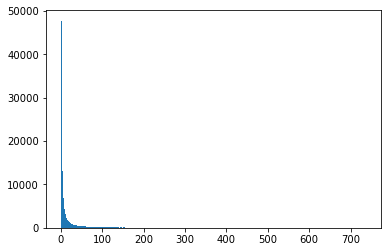

In [52]:
#the histogram on the linear scale
plt.hist(rand_x,300)
plt.show()

### Histogram on log-log scale

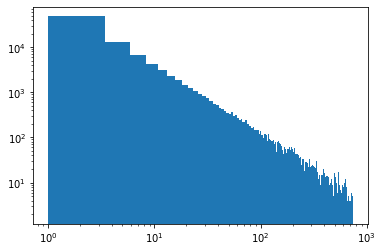

In [53]:
#the histogram on the log-log scale
plt.hist(rand_x,300)
plt.xscale('log')
plt.yscale('log')
plt.show()

You can see a linear relationship in the log-log scale, but there is a some noise to the right side of the plot.

## Logarithmic binning

In [41]:
#The values of R and r
R = 100
r = 10

#setting the range for i
i = range(-R, R+1, 1)

In [42]:
#calculating the delta_i
delta_i=np.empty(0)

for k in range(0,len(i)):
    delta_i = np.append(delta_i,np.exp(i[k]/r) - np.exp((i[k]-1)/r))

In [43]:
#calculating x_j
x_j = np.empty(0)

for k in range(0,len(i)):
    x_j= np.append(x_j, [np.exp((i[k]-1)/r) , np.exp(i[k]/r)])

x_j = x_j.reshape(-1,2) #reshaping so each row of x_j is the beginning and end of a range

In [44]:
#calculating N_i
N_i = np.empty(0)

for k in range(0,len(x_j)):
    N_i = np.append(N_i, sum((rand_x >= x_j[k][0]) & (rand_x<x_j[k][1])))

In [45]:
#calculating x_check
x_check=np.empty(0)

for k in range(0,len(i)):
    x_check= np.append(x_check, (np.exp((i[k]-1)/r) + np.exp(i[k]/r)) /2)

In [46]:
#setting up y
y = np.empty(0)

for k in range(0,len(N_i)):
    y = np.append(y, N_i[k]/delta_i[k])

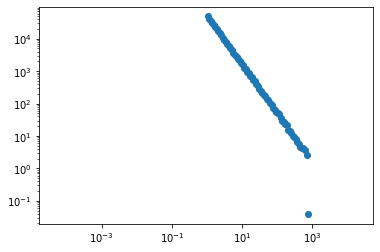

In [47]:
#show the histogram
plt.plot(x_check,y,"o")
plt.xscale('log')
plt.yscale('log')

### The difference between linear binning and logarithmic binning
In the log-log scaled linear binning, there was some noise on the right side of the plot that made it difficult to see the relationship in the samples. The linear relationship could only be observed from the middle of the histogram. However for logarithmic binning, you can see the linear relationship easily.